## Линейная классификация

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
import warnings
import time
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [3]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Смотрим на SVM, LR

In [ ]:
# Сгенерируем синтетические данные.
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

In [ ]:
x= 3
t = 0
while x <85 :
  x +=2
  x *= 2
  t+=1
print(x,t)

108 4


In [ ]:
X.shape

(10000, 10)

✅
- Обучите метод опорных векторов.
- Подберите параметр регуляризации `C`, подбирайте оптимальные гиперпараметры с точки зрения AUC-PR

In [ ]:
def auc_pr(y_test, y_pred):
    precision, recall, th = precision_recall_curve(y_test, y_pred)
    return auc(recall, precision)

In [ ]:
scl = StandardScaler()
X = scl.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

In [ ]:
def c_best_selection(C_set, clf, X_t, y_t, X_val, y_val):
    auc_p_r = 0
    C = 1.0

    for C_i in C_set:
        clf.C = C_i

        clf.fit(X_t, y_t)
        a_x = clf.predict(X_val)

        precision, recall, th = precision_recall_curve(y_val, a_x)

        auc_precision_recall = auc(recall, precision)

        if auc_precision_recall > auc_p_r:
            auc_p_r = auc_precision_recall
            C = C_i

    print("Подобранный параметр С:", C)
    return C


In [ ]:
best_c_linearSVC = c_best_selection(np.arange(0.001, 100, 1), LinearSVC(), X_train1, y_train1, X_val,  y_val)

Подобранный параметр С: 0.001


✅ На тестовой части постройте ROC и PR кривые, а также посчитайте AUC-ROC, AUC-PR с точностью до 5 знаков. Сравните AUC-ROC и AUC-PR для вашей модели с этими же метриками для случайного классификатора (который на каждом объекте выдаёт один из двух классов с равными вероятностями).

### Считаем

In [ ]:
clf = LinearSVC()
clf.C = best_c_linearSVC
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

In [ ]:
precision, recall, th_pr = precision_recall_curve(y_test, a_x)
fpr, tpr, th_roc = roc_curve(y_test, a_x)

In [ ]:
print("AUC_ROC: %0.5f" % auc(fpr, tpr))
print("AUC_PR: %0.5f"% auc(recall, precision))

AUC_ROC: 0.77199
AUC_PR: 0.83159


In [ ]:
fpr

array([0.      , 0.229265, 1.      ])

### Строим

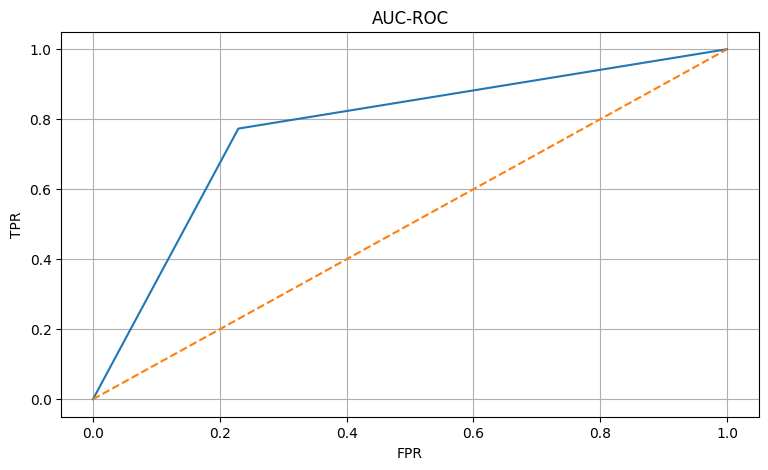

In [ ]:
plt.figure(figsize=(9,5))

plt.plot(fpr, tpr, label="ROC")
plt.plot([0,1],[0,1], linestyle='--')


plt.grid(True)
plt.title('AUC-ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
recall

array([1.        , 0.77323665, 0.        ])

In [ ]:
precision

array([0.50566667, 0.7752809 , 1.        ])

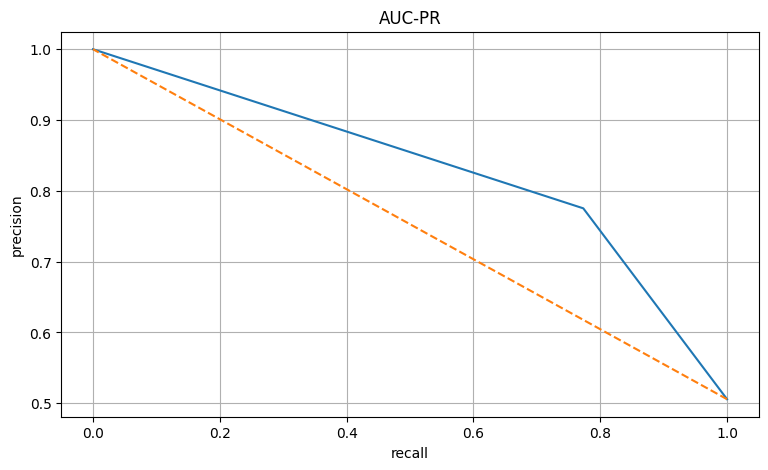

In [ ]:
plt.figure(figsize=(9,5))

plt.plot(recall, precision, label="PR")
plt.plot([1, 0], [precision[0], 1], linestyle='--')

plt.grid(True)
plt.title('AUC-PR')
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

✅
- Проделайте все то же самое для логистической регрессии (LR) — обучение, подбор параметра регуляризации (используйте L2-регуляризацию), вычисление всех метрик и построение кривых.
- Сравните результаты LR и SVM с точки зрения всех вычисленных критериев качества.

In [ ]:
best_c_LR = c_best_selection(np.arange(0.001, 100, 1), LogisticRegression(), X_train1, y_train1, X_val,  y_val)

Подобранный параметр С: 1.001


In [ ]:
clf = LogisticRegression()
clf.C = best_c_LR
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

precision, recall, th_pr = precision_recall_curve(y_test, a_x)
fpr, tpr, th_roc = roc_curve(y_test, a_x)

print("AUC_ROC: %0.5f" % auc(fpr, tpr))
print("AUC_PR: %0.5f"% auc(recall, precision))

AUC_ROC: 0.77134
AUC_PR: 0.83116


### Строим

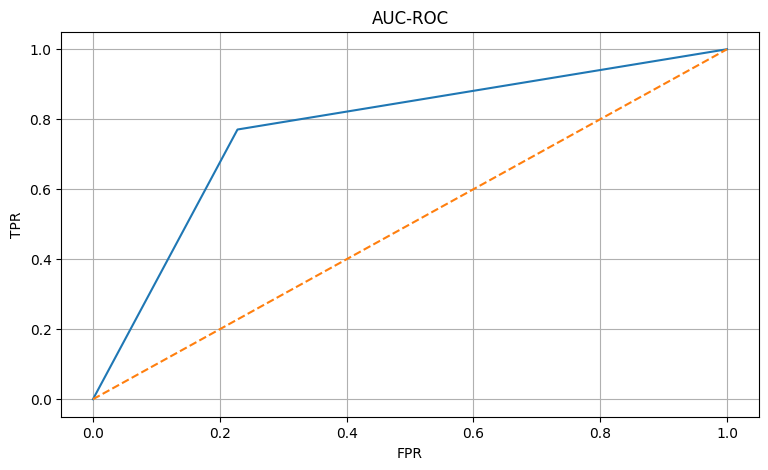

In [ ]:
plt.figure(figsize=(9,5))

plt.plot(fpr, tpr, label="ROC")
plt.plot([0,1],[0,1], linestyle='--')


plt.grid(True)
plt.title('AUC-ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
precision

array([0.50566667, 0.77571334, 1.        ])

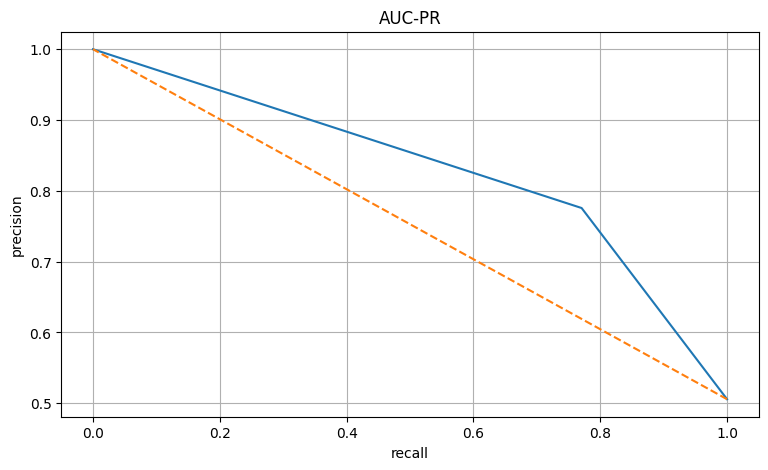

In [ ]:
plt.figure(figsize=(9,5))

plt.plot(recall, precision, label="PR")
plt.plot([1, 0], [precision[0], 1], linestyle='--')

plt.grid(True)
plt.title('AUC-PR')
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

# 📌 Работаем с признаками


Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

✅ Загрузим данные [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

✅
 - Разделите выборку на обучающую и тестовую в соотношении 3:1.
 - Зафиксируйте `random_state=777`, используйте `stratify`.
 - Удалите столбец, который не несет информации для решения задачи.



In [ ]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1

In [ ]:
df.shape

(41188, 21)

✅
- Закодируйте категориальные признаки с помощью `OrdinalEncoder`. Посчитайте качество (в этом задании будем работать c `AUC-PR`) при применении логистической регрессии. Замерьте время, потребовавшееся на обучение модели (с учетом кодирования признаков).

- Почему в данном задании мы выбрали метрикой именно `AUC-PR`, а не, к примеру, `AUC-ROC`?

**Разделим признаки на категориальные и вещественные**

In [ ]:
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

num = ['duration', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']

### Подготовка к обучению модели

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
#для кодирования категориальных признаков используем OrdinalEncoder
enc = OrdinalEncoder()

In [ ]:
#вещественные признаки также отмасштабируем
data = ColumnTransformer([
                     ('cat', enc, cat),
                     ('num', StandardScaler(), num)
                     ])


#создадим пайплайн с LogisticRegression регрессией и кодировщиком данных
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', data),
                   ('classifier', LogisticRegression())
                   ])

### Переходим к обучению

In [ ]:
df_ = pd.DataFrame({'name': ['n', 'n', 'v', 'm', 'v', 'n']})

In [ ]:
df_

,name
0,n
1,n
2,v
3,m
4,v
5,n


In [ ]:
enc.fit_transform(df_)

array([[1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'),
                                    df['y'], test_size = 0.3,
                                    random_state=777, stratify=df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
start_time = time.time()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Время на обучение OrdinalEncoder:', time.time()-start_time)
print('AUC-PR на OrdinalEncoder = %.5f' % auc_pr(y_test,y_pred))
print('Кол-во столбцов', data.fit_transform(X_train).shape[1])

Время на обучение OrdinalEncoder: 0.3824944496154785
AUC-PR на OrdinalEncoder = 0.96217
Кол-во столбцов 20


In [ ]:
model

Pipeline(steps=[('enc_and_st_scaler',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('num', StandardScaler(),
                                                  ['duration', 'age',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.conf.idx',
                                                   'cons.price.idx',
                                                   'euribor3m',
                                                   'nr.employed'])])),
                ('classifier', LogisticRegression())])

✅
- Закодируйте все категориальные признаки с помощью one-hot-кодирования.
- Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования).
- Измерьте время, потребовавшееся на кодирование категориальных признаков и обучение модели.



In [ ]:
#для кодирования категориальных признаков используем OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")

#вещественные признаки также отмасштабируем
data = ColumnTransformer([
                     ('cat', enc, cat),
                     ('num', StandardScaler(), num)
                     ])


#создадим пайплайн с LogisticRegression регрессией и кодировщиком данных
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', data),
                   ('classifier', LogisticRegression())
                   ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='y'),
                                    df['y'], test_size = 0.3,
                                    random_state=777, stratify=df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
start_time = time.time()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Время на обучение OHE:', time.time()-start_time)
print('AUC-PR на OHE = %.5f' % auc_pr(y_test,y_pred))
print('Кол-во столбцов', data.fit_transform(X_train).shape[1])

Время на обучение OHE: 0.5944318771362305
AUC-PR на OHE = 0.96287
Кол-во столбцов 63


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирования категориальных признаков — mean-target encoding (для простоты будем называть это счётчиками). Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории. Метод предполагает кодирование категорий средним арифметическим от суммы целевых меток
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$



✅
- Закодируйте категориальные переменные с помощью счётчиков:

$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

- Обучите логистическую регрессию и посмотрите на качество модели на тестовой выборке.
- Сравните с предыдущими экспериментами

In [ ]:
#вещественные признаки также отмасштабируем, категориальные отмасштабируем отдельно
data = ColumnTransformer([
                     ('cat', 'passthrough', cat),
                     ('num', StandardScaler(), num)
                     ])


#создадим пайплайн с LogisticRegression регрессией и кодировщиком данных
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', data),
                   ('classifier', LogisticRegression())
                   ])

### Кодирование категориальных, обучение модели и тестирование

In [ ]:
start_time = time.time()

for col in cat:
    for categ in list(pd.unique(X_train[col])):
        g_train = X_train[(X_train[col] == categ) & (y_train == 1)].shape[0] / X_train[X_train[col] == categ].shape[0]
        X_train.loc[X_train[col] == categ, col] = g_train


        g_test = X_test[(X_test[col] == categ) & (y_test == 1)].shape[0] / X_test[X_test[col] == categ].shape[0]
        X_test.loc[X_test[col] == categ, col] = g_test

#обучение, тестировние
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Время на обучение модели:', time.time() - start_time)
print("AUC-PR при mean-target encoding = %.5f" %  auc_pr(y_test, y_pred))
print('Кол-во столбцов ', X_train.shape[1])

Время на обучение модели: 1.1989376544952393
AUC-PR при mean-target encoding = 0.96173
Кол-во столбцов  20


✅
- Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям .
- Снова обучите логистическую регрессию, оцените качество.
- Сделайте выводы.


In [ ]:
start_time = time.time()
for col in cat:
    #добавим шума к категориальным признакам
    X_train[col] += np.random.rand(X_train.shape[0]) * np.sign(np.random.rand(X_train.shape[0]) - 0.5) / 10
    X_test[col] += np.random.rand(X_test.shape[0]) * np.sign(np.random.rand(X_test.shape[0]) - 0.5) / 10

clf = LogisticRegression()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Время на обучение модели:', time.time() - start_time)
print("AUC-PR при mean-target encoding и шуме= %.5f" %  auc_pr(y_test, y_pred))
print('Кол-во столбцов ', X_train.shape[1])

Время на обучение модели: 0.43331432342529297
AUC-PR при mean-target encoding и шуме= 0.96176
Кол-во столбцов  20


✅ Добавьте сглаживание, а затем повторите эксперименты.

$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$

In [ ]:
#разделим выборку
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'y'),
                                                    df['y'], test_size=0.3, random_state=777, stratify = df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
#вещественные признаки также отмасштабируем, категориальные отмасштабируем отдельно
date = ColumnTransformer([
                     ('cat', 'passthrough', cat),
                     ('num', StandardScaler(), num)
                     ])


#создадим пайплайн с LogisticRegression регрессией и кодировщиком данных
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', date),
                   ('classifier', LogisticRegression())
                   ])

In [ ]:
start_time = time.time()

C = 100

for col in cat:
    for categ in list(pd.unique(X_train[col])):
        g_new = X_train[(X_train[col] == categ) & (y_train == 1)].shape[0]
        #добавляем долю объектов положительного класса (global_mean)
        g_new += C * (y_train[y_train == 1].shape[0] / X_train.shape[0])
        g_new /= X_train[X_train[col] == categ].shape[0] + C
        X_train.loc[X_train[col] == categ, col] = g_new

        g_new_test = X_test[(X_test[col] == categ) & (y_test == 1)].shape[0]
        #добавляем долю объектов положительного класса (global_mean)
        g_new_test += C * (y_test[y_test == 1].shape[0] / y_train.shape[0])
        g_new_test /= C + X_test[X_test[col] == categ].shape[0]
        X_test.loc[X_test[col] == categ, col] = g_new_test

model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Время на обучение модели:', time.time() - start_time)
print("AUC-PR при global mean = %.5f" %  auc_pr(y_test, y_pred))

Время на обучение модели: 1.1672518253326416
AUC-PR при global mean = 0.96451


✅ В данных имеется признак "возраст клиента". Сейчас мы интерпретируем его как числовой, что в общем случае для линейной модели может быть неверной гипотезой. Тем не менее, у этого признака есть довольно много уникальных значений (сколько?), поэтому применять к нему one-hot кодирование может оказаться излишним. Попробуйте закодировать возраст с помощью счетчиков. Стало ли лучше?



In [ ]:
#разделим выборку
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'y'),
                                                    df['y'], test_size=0.3, random_state=777, stratify = df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
print('Кол-во уникальных возрастов', df['age'].nunique())

Кол-во уникальных возрастов 78


In [ ]:
#теперь возраст категориальная переменная
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age']

num = ['campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed', 'duration']

In [ ]:
start_time = time.time()

C = 100

for col in cat:
    for categ in list(pd.unique(X_train[col])):
        g_new = X_train[(X_train[col] == categ) & (y_train == 1)].shape[0]
        #добавляем долю объектов положительного класса
        g_new += C * (y_train[y_train == 1].shape[0] / X_train.shape[0])
        g_new /= X_train[X_train[col] == categ].shape[0] + C
        X_train.loc[X_train[col] == categ, col] = g_new

        g_new_test = X_test[(X_test[col] == categ) & (y_test == 1)].shape[0]
        #добавляем долю объектов положительного класса
        g_new_test += C * (y_test[y_test == 1].shape[0] / y_train.shape[0])
        g_new_test /= C + X_test[X_test[col] == categ].shape[0]
        X_test.loc[X_test[col] == categ, col] = g_new_test

model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Время на обучение модели:', time.time() - start_time)
print("AUC-PR при global mean = %.5f" %  auc_pr(y_test, y_pred))

Время на обучение модели: 1.5123984813690186
AUC-PR при global mean = 0.97287


**Заметим, что AUC_PR стала выше**

**Домашнее задание**

✅ Можно пойти и в обратную сторону. У нас есть признаки "месяц и день недели" для звонка. Попробуйте интерпретировать их как числовые (месяц от 0 до 12, дни недели от 0 до 4). Стало ли лучше в этот раз?

In [ ]:
X = df

In [ ]:
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'poutcome', 'age']

num = ['campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']
mn_d = ['month', 'day_of_week']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='y'),
                                    df['y'], test_size = 0.3,
                                    random_state=777, stratify=df['y'])

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
X['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
X['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_mapping = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}

In [ ]:
for col in mn_d:
  mapping = month_mapping
  if col == 'month':
      mapping = month_mapping
  elif col == 'day_of_week':
      mapping = day_mapping

  for categ, value in mapping.items():
    X_train.loc[X_train[col] == categ, col] = value
    X_test.loc[X_test[col] == categ, col] = value


X_train['day_of_week'] = X_train['day_of_week'].astype('int')
X_test['day_of_week'] = X_test['day_of_week'].astype('int')

X_train['month'] = X_train['month'].astype('int')
X_test['month'] = X_test['month'].astype('int')

C = 100

for col in cat:
    for categ in list(pd.unique(X_train[col])):
        g_new = X_train[(X_train[col] == categ) & (y_train == 1)].shape[0]
        #добавляем долю объектов положительного класса (global_mean)
        g_new += C * (y_train[y_train == 1].shape[0] / X_train.shape[0])
        g_new /= X_train[X_train[col] == categ].shape[0] + C
        X_train.loc[X_train[col] == categ, col] = g_new

        g_new_test = X_test[(X_test[col] == categ) & (y_test == 1)].shape[0]
        #добавляем долю объектов положительного класса (global_mean)
        g_new_test += C * (y_test[y_test == 1].shape[0] / y_train.shape[0])
        g_new_test /= C + X_test[X_test[col] == categ].shape[0]
        X_test.loc[X_test[col] == categ, col] = g_new_test

In [ ]:
X_train['month'].unique()

array([11,  8,  5,  6,  3,  7,  4, 10,  9, 12])

In [ ]:
X_test['day_of_week'].unique()

array([1, 2, 0, 3, 4])

In [ ]:
#вещественные признаки также отмасштабируем, категориальные отмасштабируем отдельно
date = ColumnTransformer([
                     ('cat', 'passthrough', cat),
                     ('num', StandardScaler(), num)
                     ])


#создадим пайплайн с LogisticRegression регрессией и кодировщиком данных
clf = Pipeline(steps=[
                   ('enc_and_st_scaler', date),
                   ('classifier', LogisticRegression())
                   ])

In [ ]:
start_time = time.time()

model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Время на обучение модели:', time.time() - start_time)
print("AUC-PR при global mean = %.5f" %  auc_pr(y_test, y_pred))

Время на обучение модели: 0.31351542472839355
AUC-PR при global mean = 0.95685


# 📌 Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тем же данным про банковский телефонный маркетинг.

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

#удалили целевой столбец и неинформативный признак
X = df.drop(columns=['duration', 'y'])

#обработали столбец таргета
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#разделили выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify = y)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1


✅ В данных много категориальных признаков (сейчас давайте интерпретировать возраст как числовой). Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

### Вспомним как были разделены признаки (на вещественные и категориальные)

In [ ]:
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

num = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed', 'duration']

### Закодируем категориальрные признаки с помощью one-hot кодирования

**Будем использовать метод get_dummies**

In [ ]:
#для красивого вывода названий столбцов
cat_mask = X_train.select_dtypes(include=['object']).columns
cat_mask = X_test.select_dtypes(include=['object']).columns

#drop_first = True даст k-1 столбцов для столбца с k категориями -> избежим попадения в дамми-трэп
X_train = pd.get_dummies(X_train, columns = cat_mask, drop_first=True)
X_test = pd.get_dummies(X_test, columns = cat_mask, drop_first=True)

In [ ]:
X_train.shape

(28831, 52)

✅ В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — `AUC-PR`. Обучите модель и посчитайте качество на тестовой выборке.

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
a_x = clf.predict(X_test)

auc_pr_lr_ohe = auc_pr(y_test, a_x)

In [ ]:
print("AUC_PR = %.5f" % auc_pr_lr_ohe)

AUC_PR = 0.95217


### Встроенные методы

Допустим, мы хотим оставить только 40 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded method, так как он заложен в особенности модели.





✅
 - Оставьте 40 признаков с наибольшим модулем соответствующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество?

In [ ]:
start_time = time.time()

indices = pd.DataFrame(clf.coef_[0], [*range(52)]).sort_values(by=0).tail(40).index

x_train = X_train.iloc[:, indices.values]
x_test = X_test.iloc[:, indices.values]

clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
a_x = clf1.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test, a_x)

print('Время обучения модели', time.time()-start_time)
print("AUC_PR = %.5f" % auc_pr_lr_fourty)

Время обучения модели 0.5481352806091309
AUC_PR = 0.95237


In [ ]:
indices

Index([44, 48, 51, 37, 29, 45, 38, 17, 18, 33, 14,  0, 22, 11, 26, 31, 12, 19,
        2, 23, 34, 32, 10, 27,  8, 35, 25,  1, 43, 15, 24, 20, 46,  3, 30,  9,
       36, 42,  4,  7],
      dtype='int64')

### Отмасшабируем признаки с помощью StandartScaler и OHE

**Снова разделим данные**

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

#удалили целевой столбец и неинформативный признак
X = df.drop(columns=['y'])

#обработали столбец таргета
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#разделили выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify=y)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

### Кодирование

In [ ]:
#вещественные признаки отмасштабируем с помощью StandardScaler, категориальные пока не трогаем
date = ColumnTransformer([
                     ('cat', 'passthrough', cat),
                     ('num', StandardScaler(), num)
                     ])

X_train = pd.DataFrame(date.fit_transform(X_train))
X_test = pd.DataFrame(date.transform(X_test))

In [ ]:
#кодируем категориальные признаки
cat_mask = X_train.select_dtypes(include=['object']).columns
cat_mask = X_test.select_dtypes(include=['object']).columns

#drop_first = True даст k-1 столбцов для столбца с k категориями -> избежим попадения в дамми-трэп
X_train = pd.get_dummies(data=X_train, columns=X_train.iloc[:, 0:10].columns, drop_first=True)
X_test = pd.get_dummies(data=X_test, columns=X_test.iloc[:, 0:10].columns, drop_first=True)

In [ ]:
X_train

,10,11,12,13,14,15,16,17,18,19,0_blue-collar,0_entrepreneur,0_housemaid,0_management,0_retired,0_self-employed,0_services,0_student,0_technician,0_unemployed,0_unknown,1_married,1_single,1_unknown,2_basic.6y,2_basic.9y,2_high.school,2_illiterate,2_professional.course,2_university.degree,2_unknown,3_unknown,3_yes,4_unknown,4_yes,5_unknown,5_yes,6_telephone,7_aug,7_dec,7_jul,7_jun,7_mar,7_may,7_nov,7_oct,7_sep,8_mon,8_thu,8_tue,8_wed,9_nonexistent,9_success
0,-0.289536,-0.567466,0.196418,-0.351015,-2.213588,2.249459,-1.599578,-1.669748,-2.061837,-0.035962,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False
1,-0.958139,-0.567466,0.196418,1.665344,-1.131825,0.477886,0.781528,-1.563255,-2.419431,-0.392675,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,1.62076,-0.203565,0.196418,-0.351015,-0.113695,-0.321482,-0.647481,0.233315,0.399899,-0.477976,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,0.570097,-0.567466,0.196418,1.665344,-1.195458,-1.228873,-1.17796,-1.352571,-0.93521,-0.291865,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,1.42973,-0.203565,0.196418,-0.351015,0.840802,-0.278273,1.538367,0.719154,0.845855,1.247428,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,1.42973,-0.203565,0.196418,-0.351015,0.840802,-0.278273,1.538367,0.718579,0.845855,-0.160036,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False
28827,-0.76711,-0.567466,0.196418,-0.351015,0.840802,0.953186,-0.225863,0.778445,0.845855,0.130762,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
28828,-0.480565,0.160335,0.196418,-0.351015,0.840802,-0.472714,0.593182,0.774991,0.845855,-0.29962,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
28829,0.761127,-0.567466,0.196418,-0.351015,-1.195458,-1.228873,-1.17796,-1.313427,-0.93521,-0.536136,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False


**Теперь выберем 40 признаков с наибольшим модулем соответствующего параметра линейной модели. Обучите модель, оценим её качество.**

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
start_time = time.time()

indices = pd.DataFrame(clf.coef_[0], [*range(53)]).sort_values(by=0).tail(40).index #Выбрали 40 лучших весов

x_train = X_train.iloc[:, indices.values] #выбрали признаки, соответствующие лучшим весам
x_test = X_test.iloc[:, indices.values]

clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
a_x = clf1.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test,a_x)

print('Время на обучение модели:', time.time() - start_time)
print("AUC-PR (40 признаков) = %.5f" %  auc_pr_lr_fourty)
print('indices =', indices)

Время на обучение модели: 0.337047815322876
AUC-PR (40 признаков) = 0.95300
indices = Index([49, 46, 22, 29, 12, 30, 23, 48,  5, 19,  8, 21,  0, 18, 40, 25, 26, 34,
       28, 32, 13, 20,  3, 36, 11, 35, 33, 45,  1, 15, 16,  2, 47, 10, 31, 41,
       44, 43, 37,  4],
      dtype='int64')


**Домашнее задание**

✅ one-hot кодирование возвращает нам единичные признаки-индикаторы. Попробуйте также отскалировать их, как и обычные числовые, и снова выбрать 40 главных по вкладу признаков. Изменился ли их список? Изменится ли качество?

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

#удалили целевой столбец и неинформативный признак
X = df.drop(columns=['duration', 'y'])

#обработали столбец таргета
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#разделили выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify=y)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

num = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']

In [ ]:
enc = OneHotEncoder(handle_unknown="ignore")
#вещественные признаки отмасштабируем с помощью StandardScaler, категориальные пока не трогаем
date = ColumnTransformer([
                     ('cat', enc, cat),
                     ('num', StandardScaler(), num)
                     ])

X_train = pd.DataFrame(date.fit_transform(X_train))
X_test = pd.DataFrame(date.transform(X_test))

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.289536,-0.567466,0.196418,-0.351015,-2.213588,2.249459,-1.599578,-1.669748,-2.061837
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.958139,-0.567466,0.196418,1.665344,-1.131825,0.477886,0.781528,-1.563255,-2.419431
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.620760,-0.203565,0.196418,-0.351015,-0.113695,-0.321482,-0.647481,0.233315,0.399899
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.570097,-0.567466,0.196418,1.665344,-1.195458,-1.228873,-1.177960,-1.352571,-0.935210
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.429730,-0.203565,0.196418,-0.351015,0.840802,-0.278273,1.538367,0.719154,0.845855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.429730,-0.203565,0.196418,-0.351015,0.840802,-0.278273,1.538367,0.718579,0.845855
28827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.767110,-0.567466,0.196418,-0.351015,0.840802,0.953186,-0.225863,0.778445,0.845855
28828,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.480565,0.160335,0.196418,-0.351015,0.840802,-0.472714,0.593182,0.774991,0.845855
28829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.761127,-0.567466,0.196418,-0.351015,-1.195458,-1.228873,-1.177960,-1.313427,-0.935210


In [ ]:
scaler_cat = StandardScaler(with_mean=False) # Очень важно: with_mean=False
X_train = pd.DataFrame(scaler_cat.fit_transform(X_train))
X_test = pd.DataFrame(scaler_cat.transform(X_test))

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,2.295841,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.22363,0.0,0.000000,0.000000,0.000000,2.364971,0.0,0.000000,0.000000,0.0,2.468038,0.000000,0.0,2.008994,0.0,0.000000,0.000000,0.0,2.778169,2.079914,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.346842,0.0,0.0,0.00000,0.000000,0.000000,0.000000,2.521097,0.000000,2.90946,0.0,-0.289536,-0.567466,0.196418,-0.351015,-2.213588,2.249459,-1.599578,-1.669748,-2.061837
1,2.295841,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.22363,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.189212,0.0,2.468038,0.000000,0.0,2.008994,0.0,0.000000,2.625557,0.0,0.000000,0.000000,2.079914,0.0,2.787002,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,2.521097,3.283855,0.00000,0.0,-0.958139,-0.567466,0.196418,1.665344,-1.131825,0.477886,0.781528,-1.563255,-2.419431
2,0.000000,2.409647,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.045156,0.00000,0.0,0.000000,0.000000,2.843062,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.468343,0.0,0.000000,0.0,2.002339,0.000000,0.0,2.778169,2.079914,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.346842,0.0,0.0,2.54461,0.000000,0.000000,0.000000,0.000000,0.000000,2.90946,0.0,1.620760,-0.203565,0.196418,-0.351015,-0.113695,-0.321482,-0.647481,0.233315,0.399899
3,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,3.396057,0.0,0.0,0.0,0.000000,0.000000,2.045156,0.00000,0.0,0.000000,0.000000,0.000000,2.364971,0.0,0.000000,0.000000,0.0,2.468038,0.000000,0.0,0.000000,0.0,2.002339,2.625557,0.0,0.000000,2.079914,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,2.121504,0.000000,0.0,0.0,0.00000,0.000000,2.461361,0.000000,0.000000,3.283855,0.00000,0.0,0.570097,-0.567466,0.196418,1.665344,-1.195458,-1.228873,-1.177960,-1.352571,-0.935210
4,0.000000,0.000000,5.425994,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,3.170516,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.189212,0.0,2.468038,0.000000,0.0,0.000000,0.0,2.002339,0.000000,0.0,2.778169,0.000000,2.079914,0.0,0.000000,0.0,0.000000,2.987473,0.0,0.000000,0.000000,0.0,0.0,0.00000,2.470795,0.000000,0.000000,0.000000,0.000000,2.90946,0.0,1.429730,-0.203565,0.196418,-0.351015,0.840802,-0.278273,1.538367,0.719154,0.845855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,11.145294,0.000000,2.045156,0.00000,0.0,3.328771,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.468343,0.0,0.000000,0.0,2.002339,2.625557,0.0,0.000000,0.000000,2.079914,0.0,0.000000,0.0,0.000000,2.987473,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,2.506742,0.000000,0.000000,2.90946,0.0,1.429730,-0.203565,0.196418,-0.351015,0.840802,-0.278273,1.538367,0.718579,0.845855
28827,0.000000,0.000000,0.000000,6.28644,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.045156,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.989193,0.000000,0.0,2.468038,0.000000,0.0,0.000000,0.0,2.002339,0.000000,0.0,2.778169,2.079914,0.000000,0.0,2.787002,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,2.506742,0.000000,0.000000,2.90946,0.0,-0.767110,-0.567466,0.196418,-0.351015,0.840802,0.953186,-0.225863,0.778445,0.845855
28828,0.000000,0.000000,5.425994,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.22363,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.189212,0.0,2.468038,0.000000,0.0,2.008994,0.0,0.000000,2.625557,0.0,0.000000,2.079914,0.000000,0.0,0.00

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
start_time = time.time()

indices = pd.DataFrame(clf.coef_[0], [*range(62)]).sort_values(by=0).tail(40).index #Выбрали 40 лучших весов

In [ ]:
x_train = X_train.iloc[:, indices.values] #выбрали признаки, соответствующие лучшим весам
x_test = X_test.iloc[:, indices.values]

clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
a_x = clf1.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test,a_x)

print('Время на обучение модели:', time.time() - start_time)
print("AUC-PR (40 признаков) = %.5f" %  auc_pr_lr_fourty)
print('indices =', indices)

Время на обучение модели: 1.1500868797302246
AUC-PR (40 признаков) = 0.95209
indices = Index([56,  3,  2,  6, 11,  4, 47, 48,  9,  0, 16, 28, 31, 18,  7, 22, 14, 19,
       45, 21, 24, 54, 12, 27, 13, 29, 26,  1, 51, 42, 30, 32, 46, 55, 41, 39,
       25, 50, 34, 57],
      dtype='int64')


In [ ]:
indices

Index([56,  3,  2,  6, 11,  4, 47, 48,  9,  0, 16, 28, 31, 18,  7, 22, 14, 19,
       45, 21, 24, 54, 12, 27, 13, 29, 26,  1, 51, 42, 30, 32, 46, 55, 41, 39,
       25, 50, 34, 57],
      dtype='int64')

**Домашнее задание**

### Методы фильтрации


Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods.

В качестве такой функции будем считать t-статистику:

$$t(j) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu$, $\sigma$, $n$ соответственно среднее, стандартное отклонение и количество объектов каждого из классов.




✅ Оставьте 40 признаков с наибольшим значением $t$ и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случае.

In [ ]:
from math import sqrt

In [ ]:
# Функция для расчета t-статистики для каждого признака
def calculate_t_statistic(X, y):
    """
    Вычисляет t-статистику для каждого признака.

    Args:
        X: Матрица признаков.
        y: Вектор меток классов.

    Returns:
        Series: Pandas Series с t-статистиками для каждого признака,
                индексированный именами столбцов X.
    """
    t_stats = pd.Series(index=X.columns, dtype='float64')  # Series для хранения t-статистик

    for feature in X.columns:
        # Разделяем данные на объекты класса 1 и класса 0
        X_pos = X[y == 1][feature]  # Объекты класса 1 для текущего признака
        X_neg = X[y == 0][feature]  # Объекты класса 0 для текущего признака

        # Вычисляем параметры для каждого класса
        n_pos = len(X_pos)
        n_neg = len(X_neg)

        if n_pos == 0 or n_neg == 0:  # Обработка случая, когда один из классов отсутствует
            t_stats[feature] = 0.0  # Присваиваем 0, чтобы избежать деления на 0
            continue

        mu_pos = X_pos.mean()
        mu_neg = X_neg.mean()
        sigma_pos = X_pos.std()
        sigma_neg = X_neg.std()

        # Вычисляем t-статистику
        if sigma_pos == 0 and sigma_neg == 0:
            t_stats[feature] = 0.0  # Обработка случая, когда стандартное отклонение равно 0
        else:
            t_stats[feature] = abs(mu_pos - mu_neg) / sqrt(((sigma_pos**2 * n_pos + sigma_neg**2 * n_neg)/ (n_neg + n_pos)))

    return t_stats


In [ ]:
cat = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

num = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
          'cons.conf.idx', 'cons.price.idx', 'euribor3m', 'nr.employed']

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

#удалили целевой столбец и неинформативный признак
X = df.drop(columns=['duration', 'y'])

#обработали столбец таргета
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#разделили выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777, stratify = y)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

y_train = y_train.astype('int')
y_test = y_test.astype('int')



cat = X.select_dtypes(include=['object']).columns
num = X.select_dtypes(exclude=['object']).columns

enc = OneHotEncoder(handle_unknown="ignore")
#вещественные признаки отмасштабируем с помощью StandardScaler, категориальные пока не трогаем
date = ColumnTransformer([
                     ('cat', enc, cat),
                     ('num', StandardScaler(), num)
                     ])

X_train = pd.DataFrame(date.fit_transform(X_train))
X_test = pd.DataFrame(date.transform(X_test))

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
t_stats = calculate_t_statistic(X_train, y_train)
t_stats

,0
0,0.097577
1,0.242483
2,0.047722
3,0.001353
4,0.000194
5,0.306996
6,0.012594
7,0.099610
8,0.283225
9,0.034296


In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
start_time = time.time()

indices = pd.DataFrame(t_stats, [*range(62)]).sort_values(by=0).tail(40).index

x_train = X_train.iloc[:, indices.values]
x_test = X_test.iloc[:, indices.values]

clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
a_x = clf1.predict(x_test)

auc_pr_lr_fourty = auc_pr(y_test,a_x)

print('Время на обучение модели:', time.time() - start_time)
print("AUC-PR (40 признаков) = %.5f" %  auc_pr_lr_fourty)

Время на обучение модели: 2.2261581420898438
AUC-PR (40 признаков) = 0.95339


In [ ]:
x_train

In [ ]:
indices

Index([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61],
      dtype='int64')

### Методы-обёртки


Третий из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не окажется выполненым некоторое условие (количество признаков или ухудшение качества).


✅ Снова оставьте только 40 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [4]:
#ПОДГРУЗКА ДАННЫХ
df = pd.read_csv('bank-additional-full.csv', sep=';')

#удалили целевой столбец и неинформативный признак
X = df.drop(columns=['duration', 'y'])

#обработали столбец таргета
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#обучающая и тестовая
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#валидационная
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#ПРЕОБРАЗОВАНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
y_train = y_train.astype('int')
y_train1 = y_train1.astype('int')
y_test = y_test.astype('int')
y_val = y_val.astype('int')

#КОДИРОВАНИЕ ДАННЫХ
#закодировали категории
cat_mask1 = X_train1.select_dtypes(include=['object']).columns
cat_mask2 = X_test.select_dtypes(include=['object']).columns
cat_mask3 = X_val.select_dtypes(include=['object']).columns

#drop_first = True даст k-1 столбцов для столбца с k категориями -> избежим попадения в дамми-трэп
X_train1 = pd.get_dummies(X_train1, columns = cat_mask1, drop_first=True)
X_test = pd.get_dummies(X_test, columns = cat_mask2, drop_first=True)
X_val = pd.get_dummies(X_val, columns = cat_mask3, drop_first=True)
columns_ = X_train1.columns

#отмасштабируем все!
scaler = StandardScaler()

X_train1 = pd.DataFrame(scaler.fit_transform(X_train1))
X_test = pd.DataFrame(scaler.transform(X_test))
X_val = pd.DataFrame(scaler.transform(X_val))

X_train1.columns = columns_
X_test.columns = columns_
X_val.columns = columns_

### Начинаем отбор

In [8]:
# --- БЛОК ОТБОРА ПРИЗНАКОВ (Backward Elimination) ---

print("Начинаем отбор признаков (Backward Elimination)...")
start_time = time.time()

# Начальный набор признаков
current_features = list(columns_)
target_feature_count = 40

# Модель для оценки качества
model = LogisticRegression(random_state=42, max_iter=1000) # Увеличим max_iter для сходимости

while len(current_features) > target_feature_count:
    best_score = -1  # Используем ROC AUC, поэтому ищем максимум
    feature_to_remove = None

    print(f"\nТекущее количество признаков: {len(current_features)}. Ищем признак для удаления...")

    # Пробуем удалить каждый признак по очереди
    for feature in current_features:
        temp_features = [f for f in current_features if f != feature]

        # Обучаем модель на временном наборе признаков (на train1)
        model.fit(X_train1[temp_features], y_train1)

        # Оцениваем на валидационной выборке
        y_pred_proba_val = model.predict_proba(X_val[temp_features])[:, 1]
        current_score = roc_auc_score(y_val, y_pred_proba_val)

        # Ищем признак, удаление которого дает НАИЛУЧШИЙ (или наименее худший) результат
        if current_score > best_score:
            best_score = current_score
            feature_to_remove = feature
            print(f"  Пробуем удалить '{feature}': ROC AUC = {current_score:.5f} (лучший пока)")
        else:
            print(f"  Пробуем удалить '{feature}': ROC AUC = {current_score:.5f}")


    # Удаляем худший признак из текущего набора
    if feature_to_remove:
        current_features.remove(feature_to_remove)
        print(f"Удален признак: '{feature_to_remove}'. Лучший ROC AUC на валидации после удаления: {best_score:.5f}")
    else:
        # Этого не должно произойти в данном алгоритме, но на всякий случай
        print("Не удалось определить признак для удаления. Прерываем.")
        break

end_time = time.time()
selection_duration = end_time - start_time

Начинаем отбор признаков (Backward Elimination)...

Текущее количество признаков: 52. Ищем признак для удаления...
  Пробуем удалить 'age': ROC AUC = 0.80339 (лучший пока)
  Пробуем удалить 'campaign': ROC AUC = 0.80170
  Пробуем удалить 'pdays': ROC AUC = 0.80220
  Пробуем удалить 'previous': ROC AUC = 0.80302
  Пробуем удалить 'emp.var.rate': ROC AUC = 0.79876
  Пробуем удалить 'cons.price.idx': ROC AUC = 0.80152
  Пробуем удалить 'cons.conf.idx': ROC AUC = 0.80316
  Пробуем удалить 'euribor3m': ROC AUC = 0.80307
  Пробуем удалить 'nr.employed': ROC AUC = 0.80292
  Пробуем удалить 'job_blue-collar': ROC AUC = 0.80322
  Пробуем удалить 'job_entrepreneur': ROC AUC = 0.80317
  Пробуем удалить 'job_housemaid': ROC AUC = 0.80300
  Пробуем удалить 'job_management': ROC AUC = 0.80309
  Пробуем удалить 'job_retired': ROC AUC = 0.80257
  Пробуем удалить 'job_self-employed': ROC AUC = 0.80381 (лучший пока)
  Пробуем удалить 'job_services': ROC AUC = 0.80336
  Пробуем удалить 'job_student': ROC

In [19]:
# --- ОЦЕНКА КАЧЕСТВА НА ТЕСТОВОЙ ВЫБОРКЕ С ОТОБРАННЫМИ ПРИЗНАКАМИ ---
X_train_full_scaled = pd.concat([X_train1, X_val], axis=0)
y_train_full = pd.concat([y_train1, y_val], axis=0)
print("Оценка качества на тестовой выборке с отобранными признаками...")

# Обучаем финальную модель на X_train1 с отобранными признаками
final_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
final_model.fit(X_train_full_scaled[current_features], y_train_full)

# Делаем предсказание на тестовой выборке (только с отобранными признаками)
y_pred_proba_test_selected = final_model.predict_proba(X_test[current_features])[:, 1]

# Считаем ROC AUC на тесте
test_auc_selected = roc_auc_score(y_test, y_pred_proba_test_selected)


print(f"\nКоличество отобранных признаков: {len(current_features)}")
print(f"ROC AUC на тестовой выборке (с {len(current_features)} признаками): {test_auc_selected:.5f}")
print(f"Время, затраченное на отбор признаков: {selection_duration:.2f} секунд.")

Оценка качества на тестовой выборке с отобранными признаками...

Количество отобранных признаков: 40
ROC AUC на тестовой выборке (с 40 признаками): 0.78096
Время, затраченное на отбор признаков: 167.88 секунд.


In [9]:
print("-" * 50)
print("Оставшиеся признаки:")
print(current_features)
print("-" * 50)

--------------------------------------------------
Оставшиеся признаки:
['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'nr.employed', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_student', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_high.school', 'education_illiterate', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']
--------------------------------------------------


✅ Стоит отметить, что с помощью такого метода можно пойти и в обратную сторону. Попробуйте добавлять по одному самому полезному признаку в выборку до тех пор, пока не наберется 40 штук.

In [20]:
#ПОДГРУЗКА ДАННЫХ
df = pd.read_csv('bank-additional-full.csv', sep=';')

#удалили целевой столбец и неинформативный признак
X = df.drop(columns=['duration', 'y'])

#обработали столбец таргета
df.loc[df['y'] == 'yes', 'y'] = 0
df.loc[df['y'] == 'no', 'y'] = 1
y = df['y']

#обучающая и тестовая
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#валидационная
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#ПРЕОБРАЗОВАНИЕ ЦЕЛЕЛВОЙ ПЕРЕМЕННОЙ
y_train = y_train.astype('int')
y_train1 = y_train1.astype('int')
y_test = y_test.astype('int')
y_val = y_val.astype('int')

#КОДИРОВАНИЕ ДАННЫХ
#закодировали категории
cat_mask1 = X_train1.select_dtypes(include=['object']).columns
cat_mask2 = X_test.select_dtypes(include=['object']).columns
cat_mask3 = X_val.select_dtypes(include=['object']).columns

#drop_first = True даст k-1 столбцов для столбца с k категориями -> избежим попадения в дамми-трэп
X_train1 = pd.get_dummies(X_train1, columns = cat_mask1, drop_first=True)
X_test = pd.get_dummies(X_test, columns = cat_mask2, drop_first=True)
X_val = pd.get_dummies(X_val, columns = cat_mask3, drop_first=True)
columns_ = X_train1.columns

#отмасштабируем все!
scaler = StandardScaler()

X_train1 = pd.DataFrame(scaler.fit_transform(X_train1))
X_test = pd.DataFrame(scaler.transform(X_test))
X_val = pd.DataFrame(scaler.transform(X_val))

X_train1.columns = columns_
X_test.columns = columns_
X_val.columns = columns_


X_train_3 = pd.DataFrame()
X_test_3 = pd.DataFrame()
X_valid_3 = pd.DataFrame()

### Отбор данных

In [21]:
# --- БЛОК ОТБОРА ПРИЗНАКОВ (Forward Selection) ---
all_features_processed = list(X_train1.columns)

print("Начинаем отбор признаков (Forward Selection)...")
start_time = time.time()

# Инициализация
selected_features = [] # Список УЖЕ выбранных признаков (начинаем с пустого)
available_features = all_features_processed.copy() # Список признаков, ДОСТУПНЫХ для добавления
target_feature_count = 40

# Модель для оценки качества
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

current_best_score = -1 # Лучший скор, достигнутый на данный момент

while len(selected_features) < target_feature_count and len(available_features) > 0:
    best_score_in_step = -1  # Лучший скор на ЭТОМ шаге добавления
    feature_to_add = None

    print(f"\nВыбрано признаков: {len(selected_features)}. Ищем лучший признак для добавления...")

    # Пробуем добавить каждый доступный признак по очереди
    for feature in available_features:
        # Формируем временный набор признаков = уже выбранные + текущий проверяемый
        temp_features = selected_features + [feature]

        # Обучаем модель на временном наборе признаков (на train1_scaled)
        try:
             # Если только один признак, reshape нужен для sklearn >= 1.0
            X_train_temp = X_train1[temp_features]
            if X_train_temp.ndim == 1:
                 X_train_temp = X_train_temp.values.reshape(-1, 1) # Для одного признака

            model.fit(X_train_temp, y_train1)

            # Оцениваем на валидационной выборке
            X_val_temp = X_val[temp_features]
            if X_val_temp.ndim == 1:
                 X_val_temp = X_val_temp.values.reshape(-1, 1) # Для одного признака

            y_pred_proba_val = model.predict_proba(X_val_temp)[:, 1]
            current_score = roc_auc_score(y_val, y_pred_proba_val)

            # Ищем признак, добавление которого дает НАИЛУЧШИЙ результат на этом шаге
            if current_score > best_score_in_step:
                best_score_in_step = current_score
                feature_to_add = feature
                print(f"  Пробуем добавить '{feature}': ROC AUC = {current_score:.5f} (лучший на шаге)")
            else:
                print(f"  Пробуем добавить '{feature}': ROC AUC = {current_score:.5f}")

        except Exception as e:
             print(f"  Ошибка при обработке признака '{feature}': {e}")
             # Можно пропустить признак или обработать ошибку иначе


    # Добавляем лучший найденный признак (если он найден и улучшает скор)
    if feature_to_add: # and best_score_in_step > current_best_score : # Можно добавить условие улучшения
        selected_features.append(feature_to_add)
        available_features.remove(feature_to_add)
        current_best_score = best_score_in_step # Обновляем лучший общий скор
        print(f"Добавлен признак: '{feature_to_add}'. Общий ROC AUC на валидации: {current_best_score:.5f}")
    else:
        # Если ни один признак не улучшил результат или не был найден
        print("Не удалось найти признак для добавления (возможно, достигнут предел улучшения). Прерываем.")
        break # Выходим из while цикла

end_time = time.time()
selection_duration_forward = end_time - start_time

print("-" * 50)
print(f"Отбор признаков (Forward Selection) завершен. Выбрано {len(selected_features)} признаков.")
print(f"Время, затраченное на отбор: {selection_duration_forward:.2f} секунд.")
print("Выбранные признаки:")
print(selected_features)
print("-" * 50)



Начинаем отбор признаков (Forward Selection)...

Выбрано признаков: 0. Ищем лучший признак для добавления...
  Пробуем добавить 'age': ROC AUC = 0.47550 (лучший на шаге)
  Пробуем добавить 'campaign': ROC AUC = 0.54481 (лучший на шаге)
  Пробуем добавить 'pdays': ROC AUC = 0.60286 (лучший на шаге)
  Пробуем добавить 'previous': ROC AUC = 0.61327 (лучший на шаге)
  Пробуем добавить 'emp.var.rate': ROC AUC = 0.72708 (лучший на шаге)
  Пробуем добавить 'cons.price.idx': ROC AUC = 0.61682
  Пробуем добавить 'cons.conf.idx': ROC AUC = 0.54870
  Пробуем добавить 'euribor3m': ROC AUC = 0.75265 (лучший на шаге)
  Пробуем добавить 'nr.employed': ROC AUC = 0.76026 (лучший на шаге)
  Пробуем добавить 'job_blue-collar': ROC AUC = 0.54733
  Пробуем добавить 'job_entrepreneur': ROC AUC = 0.50636
  Пробуем добавить 'job_housemaid': ROC AUC = 0.50222
  Пробуем добавить 'job_management': ROC AUC = 0.50057
  Пробуем добавить 'job_retired': ROC AUC = 0.52783
  Пробуем добавить 'job_self-employed': ROC AU

In [22]:
# --- ОЦЕНКА КАЧЕСТВА НА ТЕСТОВОЙ ВЫБОРКЕ С ОТОБРАННЫМИ ПРИЗНАКАМИ ---

print("Оценка качества на тестовой выборке с отобранными признаками (Forward Selection)...")

# --- Рекомендуемый подход: Обучение на полном обработанном трейне ---
# Объединяем обработанные части обучающей выборки (train1 и val)
X_train_full_scaled = pd.concat([X_train1, X_val], axis=0)
y_train_full = pd.concat([y_train1, y_val], axis=0)

print(f"Обучаем финальную модель на {X_train_full_scaled.shape[0]} образцах...")

# Обучаем финальную модель на ПОЛНОЙ ОБРАБОТАННОЙ обучающей выборке
# с отобранными признаками
final_model_forward = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
final_model_forward.fit(X_train_full_scaled[selected_features], y_train_full)

# Делаем предсказание вероятностей на ОБРАБОТАННОЙ тестовой выборке
# (только с отобранными признаками)
y_pred_proba_test_selected_forward = final_model_forward.predict_proba(X_test[selected_features])[:, 1]

# Считаем ROC AUC на тесте
test_auc_selected_forward = roc_auc_score(y_test, y_pred_proba_test_selected_forward)

print(f"\nКоличество отобранных признаков: {len(selected_features)}")
print(f"ROC AUC на тестовой выборке (с {len(selected_features)} признаками): {test_auc_selected_forward:.5f}")
print(f"Время, затраченное на отбор признаков: {selection_duration_forward:.2f} секунд.")

# Удаляем неиспользуемые переменные из предыдущего кода, если они есть
try:
    del X_train_3, X_test_3, X_valid_3
except NameError:
    pass # Если их не было, ничего страшного

Оценка качества на тестовой выборке с отобранными признаками (Forward Selection)...
Обучаем финальную модель на 30891 образцах...

Количество отобранных признаков: 40
ROC AUC на тестовой выборке (с 40 признаками): 0.77957
Время, затраченное на отбор признаков: 86.99 секунд.
